<a href="https://colab.research.google.com/github/bharatbs13/AIML/blob/master/mf_portfolio_nav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initliazation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from datetime import datetime


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!ls /content/drive/MyDrive/mf_html/*.html | wc -l

ls: cannot access '/content/drive/MyDrive/mf_html/*.html': No such file or directory
0


In [ ]:
#save_path = '/content/drive/MyDrive/mf_data'
input_path = '/content/drive/MyDrive/mf_output'




In [ ]:
!pip install mftool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00
  Created wheel for mftool: filename=mftool-2.7.1-py3-none-any.whl size=116638 sha256=26c429e71d13791686ae0db6831990945869c9f4b994d671eeb4c9f96c33005f
  Stored in directory: /root/.cache/pip/wheels/c6/09/88/09fb64db5b8bf00a23f0375f976d479d39eb05658249a4d9a8
Successfully built mftool


In [ ]:
from mftool import Mftool
mf = Mftool()
#  hist = mf.get_scheme_historical_nav_for_dates(str(s.returned_code), past_date, current_date)
  #data = pd.DataFrame(hist['data'])
  #data['date']= pd.to_datetime(data['date'])
  #data.sort_values(by='date', inplace=True)



In [ ]:
import os
from datetime import datetime


In [ ]:
def get_latest_transaction_file():
  files = []
  for file_path in os.listdir(input_path):
      # check if current file_path is a file
      if os.path.isfile(os.path.join(input_path, file_path)):
          # add filename to list
          files.append(file_path)
  #print(files)
  mfiles = [s for s in files if "MfTransactions_" in s]
  print(mfiles)
  mfiles = [s for s in files if "MfTransactions_" in s]
  L1 = [f.split("MfTransactions_")[1] for f in mfiles]
  L2 = [l.replace('.csv', '') for l in L1]
  myList = list(filter(None, L2))
  dates = list(filter(None, myList))
  #print(L1)
  #print(L2)
  print(dates)
  dates_dt = [datetime.strptime(x, "%Y_%m_%d") for x in dates]
  latest_dt = max(dates_dt)
  print(f'latest date : {latest_dt}')
  latest_file = f'{input_path}/MfTransactions_{latest_dt.strftime("%Y_%m_%d")}.csv'
  #print(latest_file)
  return latest_file


In [ ]:
latest_file= get_latest_transaction_file()
print(latest_file)
df = pd.read_csv(latest_file)

['MfTransactions_2024_01_23.csv']
['2024_01_23']
latest date : 2024-01-23 00:00:00
/content/drive/MyDrive/mf_output/MfTransactions_2024_01_23.csv


In [ ]:
df.head(10)

,codes,amc,isin,Type_L1,Action,Fund,max_days,sm_sharpe,sm_sortino,sm_cagr,...,Type_L3,overall_sharpe,overall_sortino,overall_cagr,norm_overall_sharpe,norm_overall_sortino,norm_overall_cagr,NormScore,RecommededAmount,verified
0,148703,UTI,INF789F1AUT5,LargeCapIndex,credit,uti nifty 200 momentum 30 index fund,240.0,0.49,0.50,22.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,149800,Motilal Oswal,INF247L01AV1,LargeCapIndex,credit,motilal oswal nifty 200 momentum 30 index fund,240.0,0.48,0.49,21.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,150487,Nippon India,INF204KC1584,LargeCapIndex,credit,nippon india nifty alpha low volatility 30 ind...,240.0,0.47,0.46,25.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,149881,UTI,INF789F1AVF2,LargeCapIndex,credit,uti s&p bse low volatility index fund,240.0,0.46,0.45,23.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,149919,Motilal Oswal,INF247L01AY5,LargeCapIndex,credit,motilal oswal s&p bse low volatility index fund,240.0,0.45,0.45,22.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,141877,DSP,INF740KA1CR7,LargeCapIndex,credit,dsp nifty 50 equal weight index fund,240.0,0.43,0.46,21.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,149107,HDFC,INF179KC1BM8,LargeCapIndex,credit,hdfc nifty50 equal weight index fund,240.0,0.43,0.46,21.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,150452,ICICI Prudential,INF109KC11D8,LargeCapIndex,credit,icici prudential nifty 200 momentum 30 index fund,240.0,0.47,0.48,20.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,150677,SBI,INF200KA16P2,SmallCapIndex,credit,sbi nifty smallcap 250 index fund direct pla...,240.0,3.16,4.35,76.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,150892,Edelweiss,INF754K01QT8,SmallCapIndex,credit,edelweiss nifty smallcap 250 index fund dire...,240.0,3.56,5.06,83.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df = df[df.platform == 'et']

In [ ]:
cols = ['codes', 'isin', 'Fund', 'Type_L1', 'Type_L2', 'Type_L3', 'Action', 'quantity', 'InvestedAmount', 'Date']

In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [ ]:
df = df[cols]


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

In [ ]:
df.head()

,codes,isin,Fund,Type_L1,Type_L2,Type_L3,Action,quantity,InvestedAmount,Date
0,148703,INF789F1AUT5,uti nifty 200 momentum 30 index fund,LargeCapIndex,NaN,NaN,credit,2954.586,45000.0,2023-08-25
1,149800,INF247L01AV1,motilal oswal nifty 200 momentum 30 index fund,LargeCapIndex,NaN,NaN,credit,3529.491,39000.0,2023-08-25
2,150487,INF204KC1584,nippon india nifty alpha low volatility 30 ind...,LargeCapIndex,NaN,NaN,credit,2928.868,34000.0,2023-08-25
3,149881,INF789F1AVF2,uti s&p bse low volatility index fund,LargeCapIndex,NaN,NaN,credit,1498.986,19000.0,2023-08-25
4,149919,INF247L01AY5,motilal oswal s&p bse low volatility index fund,LargeCapIndex,NaN,NaN,credit,1110.280,14000.0,2023-08-25


In [ ]:
df.sort_values(by='Date', inplace=True)

In [ ]:
from datetime import date, timedelta
start_date = df.Date.min().to_pydatetime().date()
end_date = date.today()
start_date, end_date

(datetime.date(2022, 3, 24), datetime.date(2024, 1, 31))

In [ ]:
df.value_counts(subset=['codes'])

codes 
119835    6
148928    5
148815    3
120828    2
149894    2
         ..
148726    1
148800    1
118494    1
149107    1
151728    1
Length: 68, dtype: int64

In [ ]:
df['quantity'] = np.where(df['Action']=='debit',   df['quantity']*-1, df['quantity'])
df['cashflow'] = np.where(df['Action']=='credit',   df['InvestedAmount']*-1, df['InvestedAmount'])


In [ ]:
df.quantity.min()

-1343.55

In [ ]:
df[df.codes == 147445]


,codes,isin,Fund,Type_L1,Type_L2,Type_L3,Action,quantity,InvestedAmount,Date,cashflow
57,147445,NaN,Mirae Asset Midcap Fund - Direct Plan - Growth,MidCap,NaN,NaN,credit,1343.55,40000.0,2022-12-19,-40000.0
49,147445,NaN,Mirae Asset Midcap Fund - Direct Plan - Growth,MidCap,NaN,NaN,debit,-1343.55,31430.0,2023-06-06,31430.0


In [ ]:
from datetime import date, timedelta
DS = pd.Series(pd.date_range(start_date ,end_date -timedelta(days=1),freq='d'))
DS = DS.to_frame('Date').reset_index(drop=True)

In [ ]:
DS.shape

(678, 1)

In [ ]:
DS

,Date
0,2022-03-24
1,2022-03-25
2,2022-03-26
3,2022-03-27
4,2022-03-28
...,...
673,2024-01-26
674,2024-01-27
675,2024-01-28
676,2024-01-29


In [ ]:
def make_full_TS(temp):
  op = pd.merge(DS, temp, on=['Date'], how='outer')
  op['quantity_avl']=op.quantity_avl.fillna(method='ffill')
  op.quantity_avl.fillna(0, inplace=True)
  return op


def make_quantity_TS(code):
  temp = df[df['codes'] == code]
  temp['cumsum_quantity'] = temp.quantity.cumsum()
  #print(temp)
  temp1 = temp.groupby('Date').cumsum_quantity.sum().to_frame('quantity_avl').reset_index()
  #temp1['codes'] = code
  #temp1['codes'] = temp1['codes'].astype(np.int64)
  temp1 = make_full_TS(temp1)
  temp1['codes'] = code
  temp1['codes'] = temp1['codes'].astype(np.int64)
  return temp1

In [ ]:
#temp = make_quantity_TS(119835)
make_quantity_TS(147445)


,Date,quantity_avl,codes
0,2022-03-24,0.0,147445
1,2022-03-25,0.0,147445
2,2022-03-26,0.0,147445
3,2022-03-27,0.0,147445
4,2022-03-28,0.0,147445
...,...,...,...
673,2024-01-26,0.0,147445
674,2024-01-27,0.0,147445
675,2024-01-28,0.0,147445
676,2024-01-29,0.0,147445


In [ ]:
quantity_TS = pd.DataFrame()
for code in df.codes.unique():
  quantity_TS = pd.concat([quantity_TS, make_quantity_TS(code)])



In [ ]:
quantity_TS.shape[0] == df.codes.unique().shape[0] * DS.shape[0]

True

In [ ]:
quantity_TS.codes.unique().shape[0] == df.codes.unique().shape[0]

True

In [ ]:
##get NAV date wise

In [ ]:
def HistoricalNav(scheme_code_list, start_date, end_date):
  # Assert keyword is a debugging tool.
  # Below assert keyword check whehther the scheme_code_list is a list and it is present, if not it raises an assertion failure message.
  assert (isinstance(scheme_code_list, list) is True), "Arguement scheme_code_list should be a list"
  assert (isinstance(start_date, str) is True), "start_date must be a str in %d-%m-%Y format" # checks whether start date is present and is in correct format.
  assert (isinstance(end_date, str) is True), "end_date must be a str in %d-%m-%Y format" # checks whether end date is present and is in correct format

  main_df = pd.DataFrame(columns = ['date', 'nav']) #empty dataframe

  for schemes in scheme_code_list:
    print(schemes)
    hist = mf.get_scheme_historical_nav_for_dates(schemes, start_date, end_date)
    #print(hist)
    data = pd.DataFrame(hist['data'])
    data['Date']= pd.to_datetime(data['date'], format='%d-%m-%Y')
    data.sort_values(by='date', inplace=True)
    data['codes'] = schemes
    data['codes'] = data['codes'].astype('int64')

    main_df = main_df.append(data) # appending the data in the main_df dataframe.

  return main_df #Returning the required Dataframe.


In [ ]:
main_df = HistoricalNav(df.codes.unique().tolist(), (start_date-timedelta(days=5)).strftime("%d-%m-%Y"), end_date.strftime("%d-%m-%Y"))


120828
125307
120841
127042
146130
147445
146196
120819
143903
119835
148928
118778
149219
149910
119716
150597
120700
148703
149800
150487
149881
149919
141877
149107
150452
150677
150892
148519
149283
148815
129188
149936
150673
148807
126353
148726
149816
150751
148662
149961
149894
149389
150902
149892
118481
118784
120323
120486
149243
120702
150822
118494
148456
150738
151728
120313
151724
151727
120679
151649
141957
140107
151604
133307
139496
148800
150517
150518


In [ ]:
main_df['codes'] = main_df.codes.astype(np.int64)
main_df['nav'] = main_df.nav.astype(np.float)

In [ ]:
main_df

,date,nav,Date,codes
19,01-01-2024,228.2763,2024-01-01,120828
242,01-02-2023,148.9565,2023-02-01,120828
222,01-03-2023,148.8298,2023-03-01,120828
449,01-04-2022,141.3374,2022-04-01,120828
409,01-06-2022,127.9150,2022-06-01,120828
...,...,...,...,...
163,31-05-2023,12.5790,2023-05-31,150518
121,31-07-2023,14.5275,2023-07-31,150518
99,31-08-2023,14.3989,2023-08-31,150518
307,31-10-2022,10.7991,2022-10-31,150518


In [ ]:
main_df.dtypes

date             object
nav             float64
Date     datetime64[ns]
codes             int64
dtype: object

In [ ]:
def make_nav_TS(code):
  print(code)
  temp1 = DS.copy()
  temp1['nav'] = np.nan
  temp2 = main_df[main_df.codes == code][['Date', 'nav']]
  nav_TS = pd.merge(temp2, temp1, on=['Date'], how="outer")
  nav_TS['nav']=nav_TS.apply(lambda x: max(x.nav_x, x.nav_y) , axis=1)

  del nav_TS['nav_x']
  del nav_TS['nav_y']

  nav_TS.sort_values(by='Date', inplace=True)
  nav_TS.reset_index(inplace=True, drop=True)
  nav_TS['nav']=nav_TS.nav.fillna(method='ffill')
  nav_TS=nav_TS[nav_TS.Date >= start_date.strftime("%Y-%m-%d")]
  print (nav_TS.shape[0] == DS.shape[0])
  nav_TS['nav']=nav_TS.nav.fillna(method='bfill')
  nav_TS['codes'] = code
  print(nav_TS.shape[0])
  print("===")
  return nav_TS




In [ ]:
full_nav_TS = pd.DataFrame()
for code in df.codes.unique():
  full_nav_TS = pd.concat([full_nav_TS, make_nav_TS(code)])


120828
True
678
===
125307
True
678
===
120841
True
678
===
127042
True
678
===
146130
True
678
===
147445
True
678
===
146196
True
678
===
120819
True
678
===
143903
True
678
===
119835
True
678
===
148928
True
678
===
118778
True
678
===
149219
True
678
===
149910
True
678
===
119716
True
678
===
150597
True
678
===
120700
True
678
===
148703
True
678
===
149800
True
678
===
150487
True
678
===
149881
True
678
===
149919
True
678
===
141877
True
678
===
149107
True
678
===
150452
True
678
===
150677
True
678
===
150892
True
678
===
148519
True
678
===
149283
True
678
===
148815
True
678
===
129188
True
678
===
149936
True
678
===
150673
True
678
===
148807
True
678
===
126353
True
678
===
148726
True
678
===
149816
True
678
===
150751
True
678
===
148662
True
678
===
149961
True
678
===
149894
True
678
===
149389
True
678
===
150902
True
678
===
149892
True
678
===
118481
True
678
===
118784
True
678
===
120323
True
678
===
120486
True
678
===
149243
True
678
===
120702
True
678
===


In [ ]:
full_nav_TS.shape[0] == df.codes.unique().shape[0] * DS.shape[0]


True

In [ ]:
full_nav_TS.codes.unique().shape[0] == df.codes.unique().shape[0]

True

In [ ]:
full_nav_TS

,Date,nav,codes
3,2022-03-24,136.9616,120828
4,2022-03-25,136.0598,120828
5,2022-03-26,136.0598,120828
6,2022-03-27,136.0598,120828
7,2022-03-28,134.9249,120828
...,...,...,...
673,2024-01-26,20.2057,150518
674,2024-01-27,20.2057,150518
675,2024-01-28,20.2057,150518
676,2024-01-29,20.8711,150518


In [ ]:
full_nav_TS.max()

Date     2024-01-30 00:00:00
nav                 675.1092
codes                 151728
dtype: object

In [ ]:
full_nav_TS.nav.isna().sum()

0

In [ ]:
full_nav_TS[full_nav_TS.isna().any(axis=1)]

,Date,nav,codes


In [ ]:
quantity_TS

,Date,quantity_avl,codes
0,2022-03-24,438.057,120828
1,2022-03-25,438.057,120828
2,2022-03-26,438.057,120828
3,2022-03-27,438.057,120828
4,2022-03-28,438.057,120828
...,...,...,...
673,2024-01-26,764.436,150518
674,2024-01-27,764.436,150518
675,2024-01-28,764.436,150518
676,2024-01-29,764.436,150518


In [ ]:
quantity_TS.quantity_avl.isna().sum()

0

In [ ]:
nav_unit_code_ts = pd.merge(full_nav_TS, quantity_TS, on=['Date', 'codes'], how='outer').sort_values(by='Date')

In [ ]:
nav_unit_code_ts

,Date,nav,codes,quantity_avl
0,2022-03-24,136.9616,120828,438.057
28476,2022-03-24,10.1624,150902,0.000
16272,2022-03-24,10.1066,150452,0.000
29154,2022-03-24,10.3236,149892,0.000
15594,2022-03-24,10.6768,149107,0.000
...,...,...,...,...
25763,2024-01-30,15.5078,150751,265.108
25085,2024-01-30,12.8604,149816,420.196
24407,2024-01-30,20.2883,148726,339.004
33899,2024-01-30,41.4700,120702,489.413


In [ ]:
def get_adjusted(s):
  if s.nav//100 == 0 and s.nav%100 < 10:
    alpha = 100

  if s.nav//100 == 0 and s.nav%100 >= 10:
    alpha = 10

  if 1 <= s.nav//100 < 10:
    alpha = 1

  if 10 <= s.nav//100 < 100:
    alpha = 1/10

  if 100 <= s.nav//100 < 1000:
    alpha = 1/100


  s['adj_nav'] = s.nav * alpha
  s['adj_quantity_avl'] = s.quantity_avl / alpha

  return s

In [ ]:
nav_unit_code_ts_adj = nav_unit_code_ts.apply(get_adjusted, axis=1)

In [ ]:
nav_unit_code_ts_adj['portfolio_value'] = nav_unit_code_ts_adj.nav * nav_unit_code_ts_adj.quantity_avl
nav_unit_code_ts_adj['adj_portfolio_value'] = nav_unit_code_ts_adj.adj_nav * nav_unit_code_ts_adj.adj_quantity_avl

In [ ]:
nav_unit_code_ts_adj

,Date,nav,codes,quantity_avl,adj_nav,adj_quantity_avl,portfolio_value,adj_portfolio_value
0,2022-03-24,136.9616,120828,438.057,136.9616,438.0570,59996.987611,59996.987611
28476,2022-03-24,10.1624,150902,0.000,101.6240,0.0000,0.000000,0.000000
16272,2022-03-24,10.1066,150452,0.000,101.0660,0.0000,0.000000,0.000000
29154,2022-03-24,10.3236,149892,0.000,103.2360,0.0000,0.000000,0.000000
15594,2022-03-24,10.6768,149107,0.000,106.7680,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
25763,2024-01-30,15.5078,150751,265.108,155.0780,26.5108,4111.241842,4111.241842
25085,2024-01-30,12.8604,149816,420.196,128.6040,42.0196,5403.888638,5403.888638
24407,2024-01-30,20.2883,148726,339.004,202.8830,33.9004,6877.814853,6877.814853
33899,2024-01-30,41.4700,120702,489.413,414.7000,48.9413,20295.957110,20295.957110


In [ ]:
nav_unit_code_ts_adj[(nav_unit_code_ts_adj.adj_nav < 100) | (nav_unit_code_ts_adj.adj_nav > 1000)].empty

True

In [ ]:
#full_quantity_TS = quantity_TS.groupby('Date').quantity_avl.sum().to_frame('quantity_avl').reset_index()
#full_quantity_TS=nav_unit_code_ts.groupby(['Date']).agg({'quantity_avl':'sum','quantity_avl_norm':'sum'}).reset_index().sort_values(by='Date')
#portfolio_TS = pd.merge(full_nav_TS, quantity_TS, on=['Date', 'codes'], how="outer")


In [ ]:
portfolio_TS=nav_unit_code_ts_adj.groupby(['Date']).agg({'quantity_avl':'sum','adj_quantity_avl':'sum', 'portfolio_value':'sum', 'adj_portfolio_value':'sum'}).reset_index().sort_values(by='Date')

In [ ]:
portfolio_TS

,Date,quantity_avl,adj_quantity_avl,portfolio_value,adj_portfolio_value
0,2022-03-24,1518.617,546.1130,1.099945e+05,1.099945e+05
1,2022-03-25,1518.617,546.1130,1.094590e+05,1.094590e+05
2,2022-03-26,1518.617,546.1130,1.094590e+05,1.094590e+05
3,2022-03-27,1518.617,546.1130,1.094590e+05,1.094590e+05
4,2022-03-28,1518.617,546.1130,1.086485e+05,1.086485e+05
...,...,...,...,...,...
673,2024-01-26,113826.839,15774.1142,3.358741e+06,3.358741e+06
674,2024-01-27,113826.839,15774.1142,3.358741e+06,3.358741e+06
675,2024-01-28,113826.839,15774.1142,3.358741e+06,3.358741e+06
676,2024-01-29,113826.839,15774.1142,3.408941e+06,3.408941e+06


In [ ]:
portfolio_TS.shape[0] == DS.shape[0]

True

In [ ]:
import seaborn as sns

<Axes: xlabel='Date', ylabel='portfolio_value'>

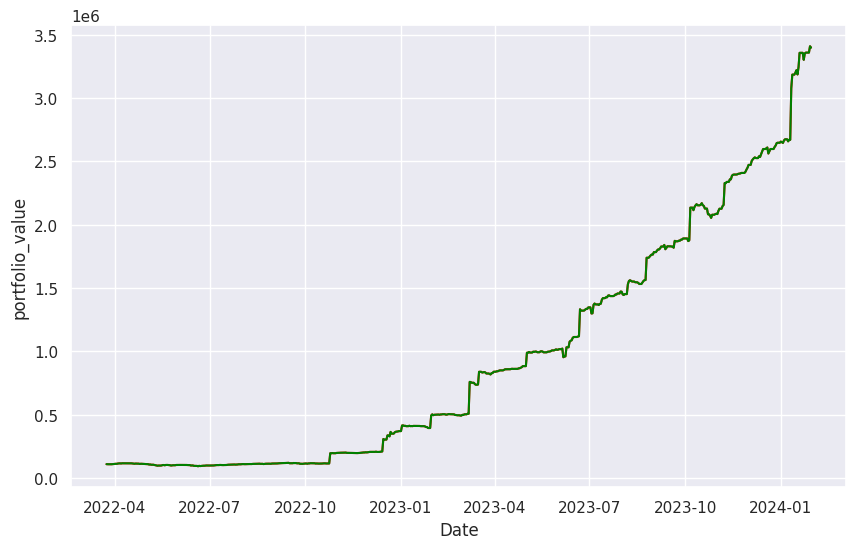

In [ ]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(x="Date", y="portfolio_value",data = portfolio_TS, color='red')
sns.lineplot(x="Date", y="adj_portfolio_value",data = portfolio_TS, color='green')

In [ ]:
def make_IA_TS():
  temp1 = DS.copy()
  temp1['sofar_invested'] = np.nan
  temp2 = df.groupby('Date').cashflow.sum().to_frame('cashflow').reset_index()
  temp2['cashflow'] = temp2.cashflow * -1
  temp2['sofar_invested']= temp2.cashflow.cumsum()
  del temp2['cashflow']
  IA_TS = pd.merge(temp2, temp1, on=['Date'], how="outer")
  print (IA_TS.shape[0] == DS.shape[0])
  #IA_TS = IA_TS.fillna(0)
  #IA_TS['cashflow']=IA_TS.cashflow_x+IA_TS.cashflow_y
  IA_TS['sofar_invested']=IA_TS.apply(lambda x: max(x.sofar_invested_x, x.sofar_invested_y) , axis=1)
  del IA_TS['sofar_invested_x']
  del IA_TS['sofar_invested_y']
  IA_TS.sort_values(by='Date', inplace=True)
  IA_TS.reset_index(inplace=True, drop=True)
  IA_TS['sofar_invested']=IA_TS.sofar_invested.fillna(method='ffill')
  return IA_TS



In [ ]:
df[df.Action == 'debit']

,codes,isin,Fund,Type_L1,Type_L2,Type_L3,Action,quantity,InvestedAmount,Date,cashflow
49,147445,NaN,Mirae Asset Midcap Fund - Direct Plan - Growth,MidCap,NaN,NaN,debit,-1343.550,31430.00,2023-06-06,31430.00
50,120819,NaN,quant absolute fund direct growth,AggressiveHybrid,NaN,NaN,debit,-121.665,38970.00,2023-06-06,38970.00
40,125307,INF663L01DV3,PGIM India Midcap Opportunities Fund - Direct ...,MidCap,NaN,NaN,debit,-1080.560,56955.75,2023-07-03,56955.75


In [ ]:
Full_IA_TS = make_IA_TS()

True


In [ ]:
Full_IA_TS

,Date,sofar_invested
0,2022-03-24,110000.00
1,2022-03-25,110000.00
2,2022-03-26,110000.00
3,2022-03-27,110000.00
4,2022-03-28,110000.00
...,...,...
673,2024-01-26,2423480.26
674,2024-01-27,2423480.26
675,2024-01-28,2423480.26
676,2024-01-29,2423480.26


In [ ]:
final_TS=pd.merge(portfolio_TS, Full_IA_TS, on='Date', how='outer')

In [ ]:
final_TS.sort_values(by='Date', inplace=True)

In [ ]:
final_TS

,Date,quantity_avl,adj_quantity_avl,portfolio_value,adj_portfolio_value,sofar_invested
0,2022-03-24,1518.617,546.1130,1.099945e+05,1.099945e+05,110000.00
1,2022-03-25,1518.617,546.1130,1.094590e+05,1.094590e+05,110000.00
2,2022-03-26,1518.617,546.1130,1.094590e+05,1.094590e+05,110000.00
3,2022-03-27,1518.617,546.1130,1.094590e+05,1.094590e+05,110000.00
4,2022-03-28,1518.617,546.1130,1.086485e+05,1.086485e+05,110000.00
...,...,...,...,...,...,...
673,2024-01-26,113826.839,15774.1142,3.358741e+06,3.358741e+06,2423480.26
674,2024-01-27,113826.839,15774.1142,3.358741e+06,3.358741e+06,2423480.26
675,2024-01-28,113826.839,15774.1142,3.358741e+06,3.358741e+06,2423480.26
676,2024-01-29,113826.839,15774.1142,3.408941e+06,3.408941e+06,2423480.26


In [ ]:
final_TS['absolute_PL'] = np.round((final_TS.portfolio_value - final_TS.sofar_invested), 2)

In [ ]:
final_TS

,Date,quantity_avl,adj_quantity_avl,portfolio_value,adj_portfolio_value,sofar_invested,absolute_PL
0,2022-03-24,1518.617,546.1130,1.099945e+05,1.099945e+05,110000.00,-5.50
1,2022-03-25,1518.617,546.1130,1.094590e+05,1.094590e+05,110000.00,-541.01
2,2022-03-26,1518.617,546.1130,1.094590e+05,1.094590e+05,110000.00,-541.01
3,2022-03-27,1518.617,546.1130,1.094590e+05,1.094590e+05,110000.00,-541.01
4,2022-03-28,1518.617,546.1130,1.086485e+05,1.086485e+05,110000.00,-1351.53
...,...,...,...,...,...,...,...
673,2024-01-26,113826.839,15774.1142,3.358741e+06,3.358741e+06,2423480.26,935260.61
674,2024-01-27,113826.839,15774.1142,3.358741e+06,3.358741e+06,2423480.26,935260.61
675,2024-01-28,113826.839,15774.1142,3.358741e+06,3.358741e+06,2423480.26,935260.61
676,2024-01-29,113826.839,15774.1142,3.408941e+06,3.408941e+06,2423480.26,985460.48


In [ ]:
final_TS['portfolio_nav'] = final_TS.adj_portfolio_value / final_TS.adj_quantity_avl

In [ ]:
final_TS.sort_values(by='Date', inplace=True)

In [ ]:
final_TS

,Date,quantity_avl,adj_quantity_avl,portfolio_value,adj_portfolio_value,sofar_invested,absolute_PL,portfolio_nav
0,2022-03-24,1518.617,546.1130,1.099945e+05,1.099945e+05,110000.00,-5.50,201.413442
1,2022-03-25,1518.617,546.1130,1.094590e+05,1.094590e+05,110000.00,-541.01,200.432852
2,2022-03-26,1518.617,546.1130,1.094590e+05,1.094590e+05,110000.00,-541.01,200.432852
3,2022-03-27,1518.617,546.1130,1.094590e+05,1.094590e+05,110000.00,-541.01,200.432852
4,2022-03-28,1518.617,546.1130,1.086485e+05,1.086485e+05,110000.00,-1351.53,198.948703
...,...,...,...,...,...,...,...,...
673,2024-01-26,113826.839,15774.1142,3.358741e+06,3.358741e+06,2423480.26,935260.61,212.927384
674,2024-01-27,113826.839,15774.1142,3.358741e+06,3.358741e+06,2423480.26,935260.61,212.927384
675,2024-01-28,113826.839,15774.1142,3.358741e+06,3.358741e+06,2423480.26,935260.61,212.927384
676,2024-01-29,113826.839,15774.1142,3.408941e+06,3.408941e+06,2423480.26,985460.48,216.109805


In [ ]:
final_TS[['portfolio_value', 'adj_portfolio_value', 'sofar_invested', 'absolute_PL', 'portfolio_nav']].corr()

,portfolio_value,adj_portfolio_value,sofar_invested,absolute_PL,portfolio_nav
portfolio_value,1.000000,1.000000,0.992481,0.901834,-0.102505
adj_portfolio_value,1.000000,1.000000,0.992481,0.901834,-0.102505
sofar_invested,0.992481,0.992481,1.000000,0.842168,-0.147095
absolute_PL,0.901834,0.901834,0.842168,1.000000,0.067685
portfolio_nav,-0.102505,-0.102505,-0.147095,0.067685,1.000000


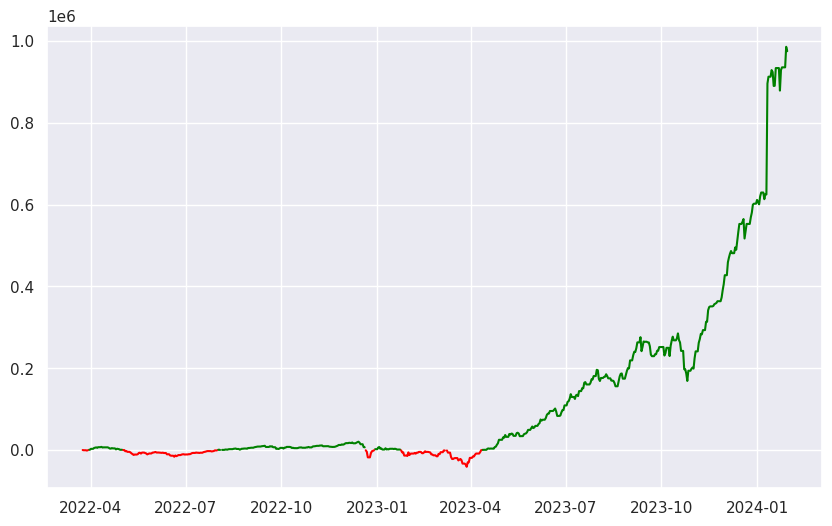

In [ ]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10,6)})
import matplotlib.pyplot as plt

#final_TS.absolute_PL.where(final_TS.absolute_PL.ge(0), np.nan).plot(color='green')
#final_TS.absolute_PL.where(final_TS.absolute_PL.lt(0), np.nan).plot(color='red')

plt.plot(final_TS.Date, final_TS.absolute_PL.where(final_TS.absolute_PL.ge(0), np.nan), color='green')
plt.plot(final_TS.Date, final_TS.absolute_PL.where(final_TS.absolute_PL.lt(0), np.nan), color='red')
plt.show()


<Axes: xlabel='Date', ylabel='portfolio_nav'>

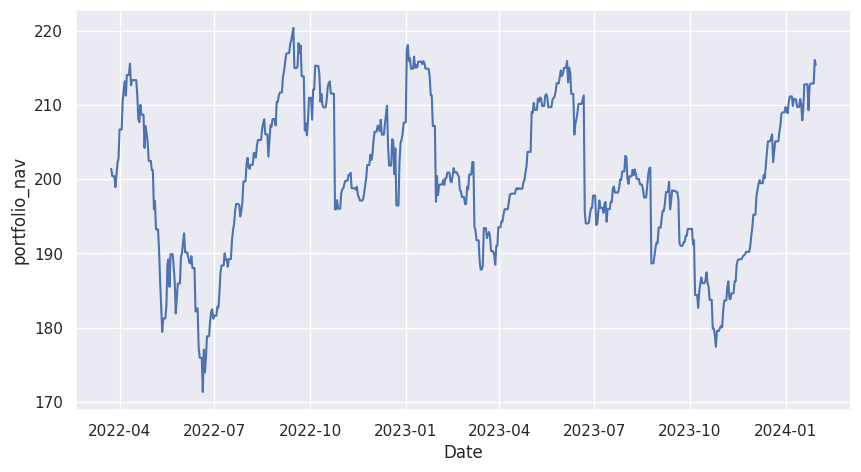

In [ ]:

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10,5.2)})
sns.lineplot(x="Date", y="portfolio_nav",data = final_TS)


<Axes: xlabel='Date', ylabel='sofar_invested'>

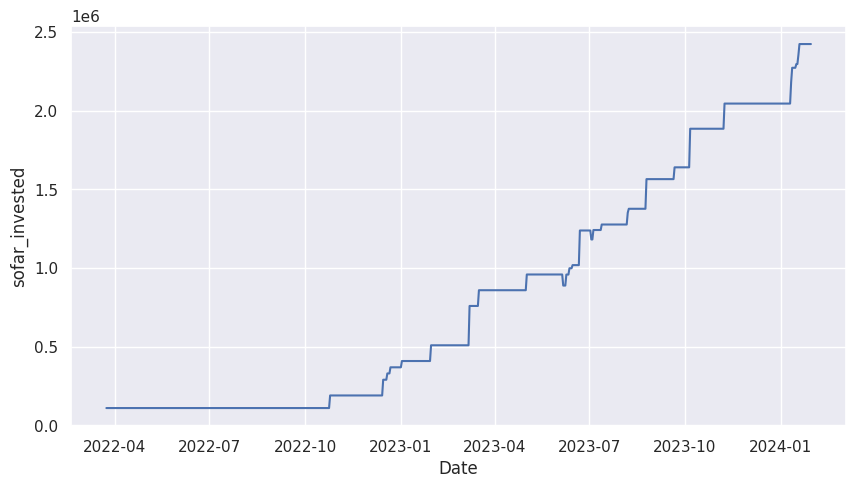

In [ ]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10,5.2)})
sns.lineplot(x="Date", y="sofar_invested",data = final_TS)


<Axes: xlabel='Date', ylabel='portfolio_value'>

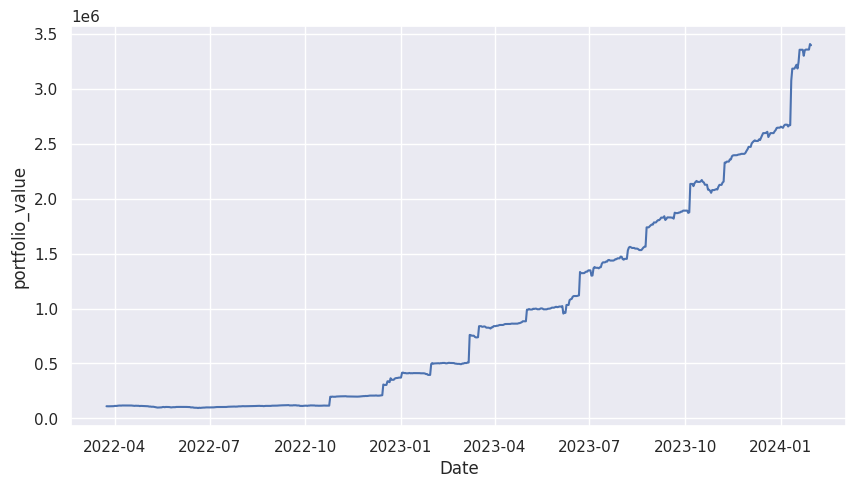

In [ ]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10,5.2)})
sns.lineplot(x="Date", y="portfolio_value",data = final_TS)

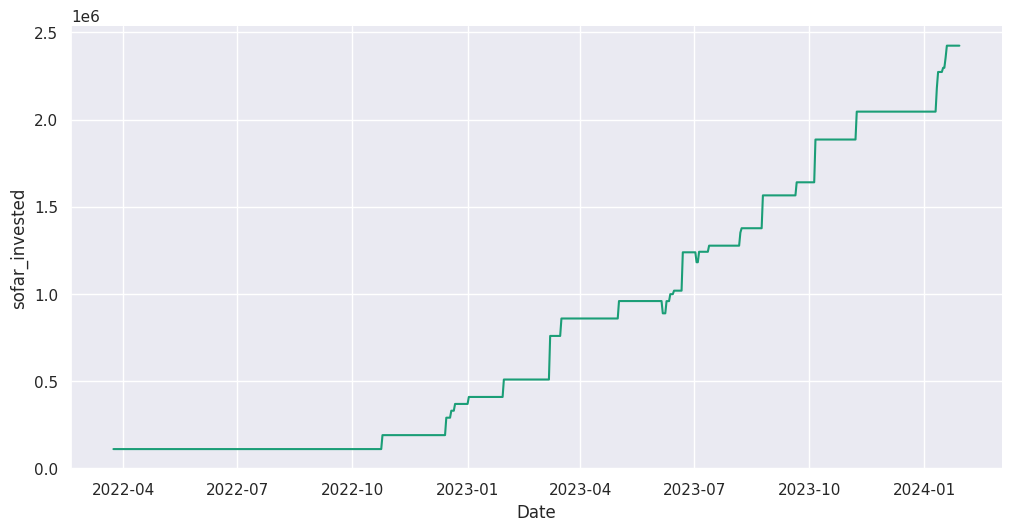

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['sofar_invested']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = final_TS.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('sofar_invested')

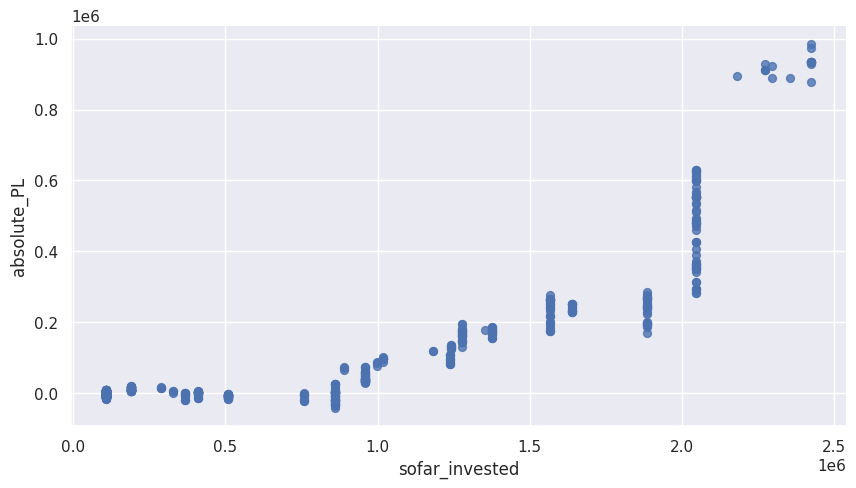

In [ ]:
from matplotlib import pyplot as plt
final_TS.plot(kind='scatter', x='sofar_invested', y='absolute_PL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

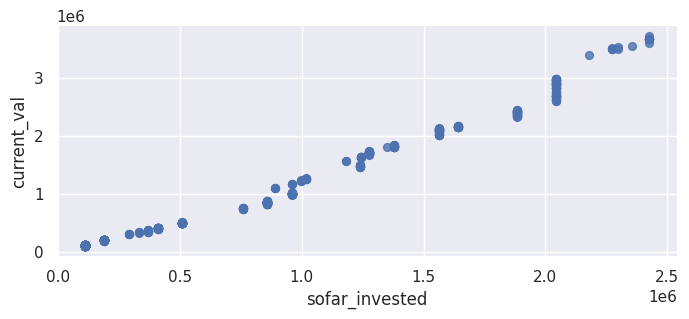

In [ ]:
from matplotlib import pyplot as plt
final_TS.plot(kind='scatter', x='sofar_invested', y='current_val', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)